In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from textwrap import wrap

%matplotlib inline
sns.set_style('white')

In [4]:
df = pd.read_csv('02-14-2020_1123.csv') # covid data
df_new = df.dropna()

In [5]:
df_new.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-14 10:03:03,51986,1318,3900
1,Guangdong,Mainland China,2020-02-14 12:53:02,1261,2,362
2,Henan,Mainland China,2020-02-14 12:53:02,1184,11,357
3,Zhejiang,Mainland China,2020-02-14 14:13:15,1155,0,403
4,Hunan,Mainland China,2020-02-14 09:23:04,988,2,364


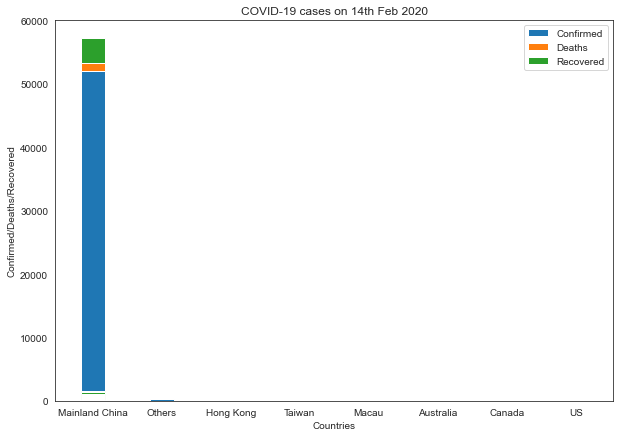

In [6]:
countries = df_new.iloc[:,1] # all rows, country column
bar_confirmed =df_new.iloc[:,3] 
bar_deaths = df_new.iloc[:,4] 
bar_recovered = df_new.iloc[:,5]
#index =np.arange(len(dfnew))
plt.figure(figsize=(10,7))
graph_confirmed = plt.bar(x=countries, height=bar_confirmed, width=0.35)
graph_deaths = plt.bar(x=countries, height=bar_deaths, width=0.35, bottom=bar_confirmed)
graph_recovered = plt.bar(x=countries, height=bar_recovered, width=0.35, bottom=bar_confirmed+bar_deaths)

plt.xlabel('Countries')
plt.ylabel('Confirmed/Deaths/Recovered')
plt.title('COVID-19 cases on 14th Feb 2020')
plt.legend((graph_confirmed, graph_deaths, graph_recovered), ('Confirmed', 'Deaths', 'Recovered'), loc='upper right')



In [10]:
print(df_new[['Country/Region', 'Confirmed']].where(df_new['Country/Region'] == 'Mainland China').sum())
print(df_new[['Country/Region', 'Recovered']].where(df_new['Country/Region'] == 'Mainland China').sum())    

Confirmed    63866.0
dtype: float64
Recovered    7086.0
dtype: float64


<ipython-input-10-06436751e727>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_new[['Country/Region', 'Confirmed']].where(df_new['Country/Region'] == 'Mainland China').sum())
<ipython-input-10-06436751e727>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_new[['Country/Region', 'Recovered']].where(df_new['Country/Region'] == 'Mainland China').sum())


<ipython-input-12-8fa6165326fb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().plot.barh()


<AxesSubplot:ylabel='Country/Region'>

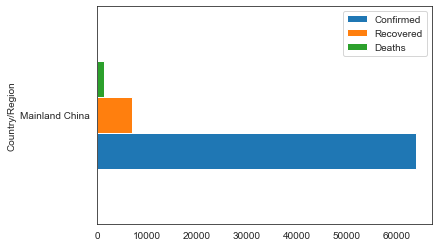

In [12]:
data = df_new[['Country/Region','Confirmed','Recovered','Deaths']].where(df_new['Country/Region'] == 'Mainland China')
data.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().plot.barh()


### Statistical Distribution Plots


In [14]:
tsData = pd.read_csv('time_series_19-covid-Confirmed_archived_0325.csv')
tsData.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [15]:
tsData.shape

(501, 66)

In [16]:
tsData.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/19/20             int64
3/20/20             int64
3/21/20             int64
3/22/20             int64
3/23/20           float64
Length: 66, dtype: object

In [17]:
tsData.drop(tsData.columns[[0,2,3]], inplace=True, axis=1) # Dropped irrelevant columns

In [18]:
tsData.loc[~(tsData==0).any(axis=1)] # removed zero entries

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,82,114,147,177,212,272,322,411,599,599.0
1,Japan,2,1,2,2,4,4,7,7,11,...,773,839,825,878,889,924,963,1007,1086,1086.0
154,China,444,444,549,761,1058,1423,3554,3554,4903,...,67790,67794,67798,67799,67800,67800,67800,67800,67800,67800.0
156,"Korea, South",1,1,2,2,3,4,4,4,4,...,8086,8162,8236,8320,8413,8565,8652,8799,8897,8897.0
158,China,26,32,53,78,111,151,207,277,354,...,1356,1360,1361,1364,1370,1378,1395,1400,1407,1413.0
159,China,5,5,9,32,83,128,168,206,278,...,1273,1273,1273,1273,1273,1273,1273,1273,1273,1274.0
160,China,10,27,43,62,104,128,173,296,428,...,1227,1231,1231,1232,1232,1233,1234,1236,1237,1238.0
161,China,4,9,24,43,69,100,143,221,277,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018.0
162,China,1,9,15,39,60,70,106,152,200,...,990,990,990,990,990,990,990,990,990,990.0
163,China,2,7,18,18,36,72,109,109,162,...,935,935,935,935,935,935,935,935,936,936.0


<AxesSubplot:xlabel='1/31/20', ylabel='Density'>

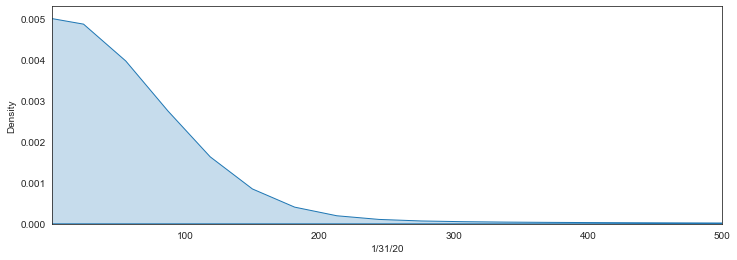

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set(xlim=(1,500))
sns.kdeplot(tsData.iloc[:,10], shade=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='50', ylabel='Density'>

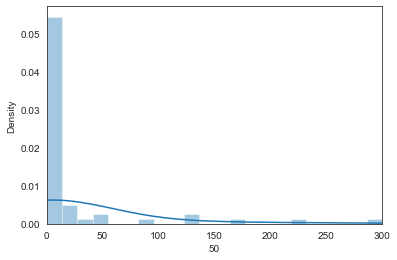

In [20]:
plt.xlim(0,300)
sns.distplot(tsData.iloc[50,1:60])

In [23]:
import matplotlib
import matplotlib.animation as animation

overdoses = pd.read_excel('overdose_data_1999-2015.xls', sheet_name='Online', skiprows=6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [24]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
overdose.columns = {title}
overdose.dtypes

Heroin Overdoses    float64
dtype: object

In [27]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

In [28]:
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


<IPython.core.display.Javascript object>


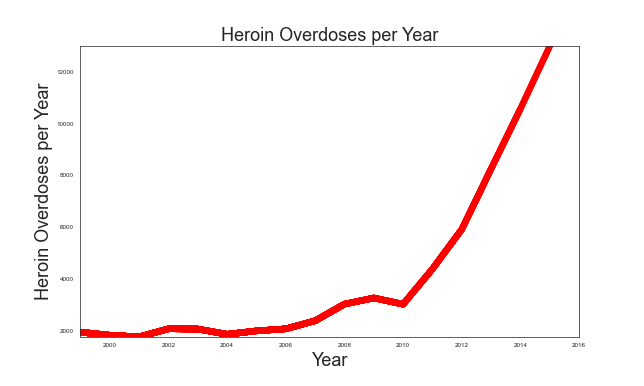

In [43]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Heroin Overdoses per Year', fontsize=20)
plt.title('Heroin Overdoses per Year', fontsize=20)
         

def animate(i):
    data = overdose.iloc[:int(i+1)]
    p = sns.lineplot(x=data.index, y=data[title], data=data, color='r')
    p.tick_params(labelsize=7)
    plt.setp(p.lines,linewidth=7)

In [44]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [45]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

In [46]:
from IPython.display import Video
Video('HeroinOverdosesJumpy.mp4')

### Seaborn vs Matplotlib

In [47]:
plt.style.use('classic')
%matplotlib inline

In [49]:
#create some random data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

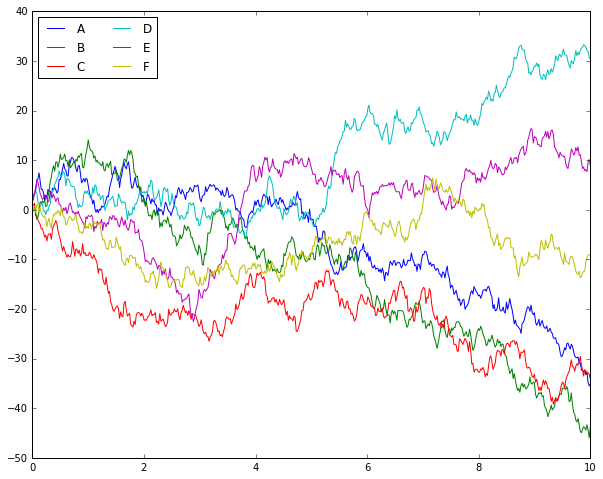

In [51]:
#make a simple plot with Matplotlib defaults
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

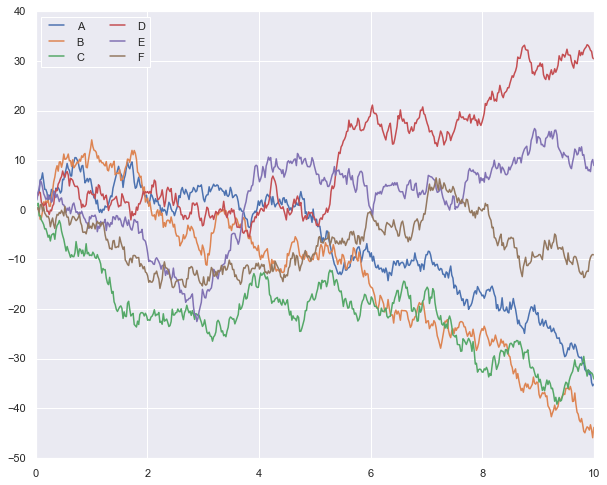

In [52]:
sns.set()
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')